In [196]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'STSong'
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')

# 数据读取

In [197]:
df_train = pd.read_csv('../titanic_dir/titanic_data/train.csv')
df_test = pd.read_csv('../titanic_dir/titanic_data/test.csv')
df_all = pd.concat([df_train, df_test])
df_all.reset_index(drop=True,inplace=True)

print('df_all'+'*'*20)
print(df_all.columns)

# print('df_train'+'*'*20)
# print(df_train.columns)

# print('df_test'+'*'*20)
# print(df_test.columns)

df_all********************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [198]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [199]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**Age，Cabin数据缺失率较大;<br />
Embarked，Fare 缺失率很小**

# feature相关性关系

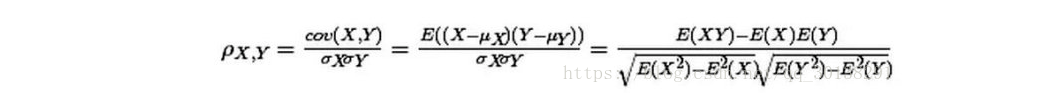

In [200]:
df_all.corr('pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


# 数据填充

In [201]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Fare

In [202]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


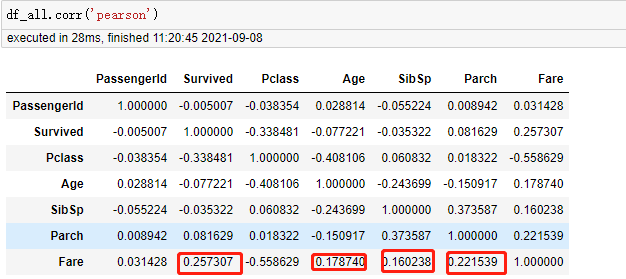

**Fare只缺失一个数据，而且是来自于test-验证数据，所以Survived为空，Age,SibSp,Parch三个属性和Fare相关性大于0.1，而且这行数据这三个值都不为空，但是这里的Age是连续值，不好分组，考虑到这里只有一条数据缺失,所以就舍弃Age,因为一般都会考虑到性别，所以最后也把Sex加上，所以这里用SibSp,Parch，Sex这三个属性-groupby分组之后的中位数填充**

In [203]:
df_all.groupby(['Parch', 'SibSp','Sex'])['Fare'].median()
# df_all.groupby(['Parch', 'Age', 'SibSp','Sex'])['Fare'].median().to_clipboard()

Parch  SibSp  Sex   
0      0      female     10.50000
              male        8.05000
       1      female     26.00000
              male       26.00000
       2      female     23.25000
              male       23.25000
       3      female     18.42500
              male       18.00000
1      0      female     39.40000
              male       33.00000
       1      female     26.00000
              male       23.00000
       2      female     23.00000
              male       25.25000
       3      female     25.46670
              male       21.55000
       4      male       34.40625
2      0      female     22.35830
              male       30.75000
       1      female     41.57920
              male       41.57920
       2      female    148.37500
              male      148.37500
       3      female    263.00000
              male       27.90000
       4      female     31.27500
              male       31.38750
       5      female     46.90000
              male       46

In [204]:
df_all['Fare'] = df_all['Fare'].fillna(8.05000)

In [205]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Embarked

In [206]:
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [207]:
df_all.groupby(['Fare','Sex','Embarked'])['Embarked'].count()

Fare      Sex     Embarked
0.0000    male    S           17
3.1708    male    S            1
4.0125    male    C            1
5.0000    male    S            1
6.2375    male    S            1
                              ..
262.3750  male    C            2
263.0000  female  S            4
          male    S            2
512.3292  female  C            2
          male    C            2
Name: Embarked, Length: 447, dtype: int64

**缺失的这两行，都为女性，费用是80**
这里用对应的：
票价在(78.051, 512.329]区间
女性里，数量最多的<span class="burk">C港口</span>填充

In [208]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('C')

In [209]:
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Age

In [210]:
df_all['Age'].isnull().value_counts()

False    1046
True      263
Name: Age, dtype: int64

<AxesSubplot:>

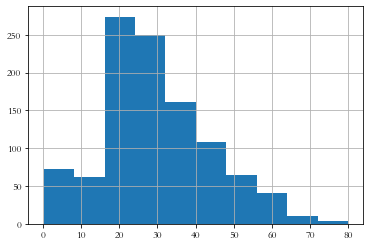

In [211]:
df_all['Age'].hist()

In [212]:
# 缺失的数据里面，每个属性的计数情况
for feature in ['Pclass','Sex','SibSp','Parch','Embarked']:
    print(feature,"*"*20)
    print(df_all[df_all['Age'].isnull()][feature].value_counts())
 

Pclass ********************
3    208
1     39
2     16
Name: Pclass, dtype: int64
Sex ********************
male      185
female     78
Name: Sex, dtype: int64
SibSp ********************
0    206
1     39
8      8
2      6
3      4
Name: SibSp, dtype: int64
Parch ********************
0    234
2     16
1     10
9      2
4      1
Name: Parch, dtype: int64
Embarked ********************
S    132
Q     73
C     58
Name: Embarked, dtype: int64


In [213]:
df_all['Age_cut'] = pd.cut(df_all['Age'],10)

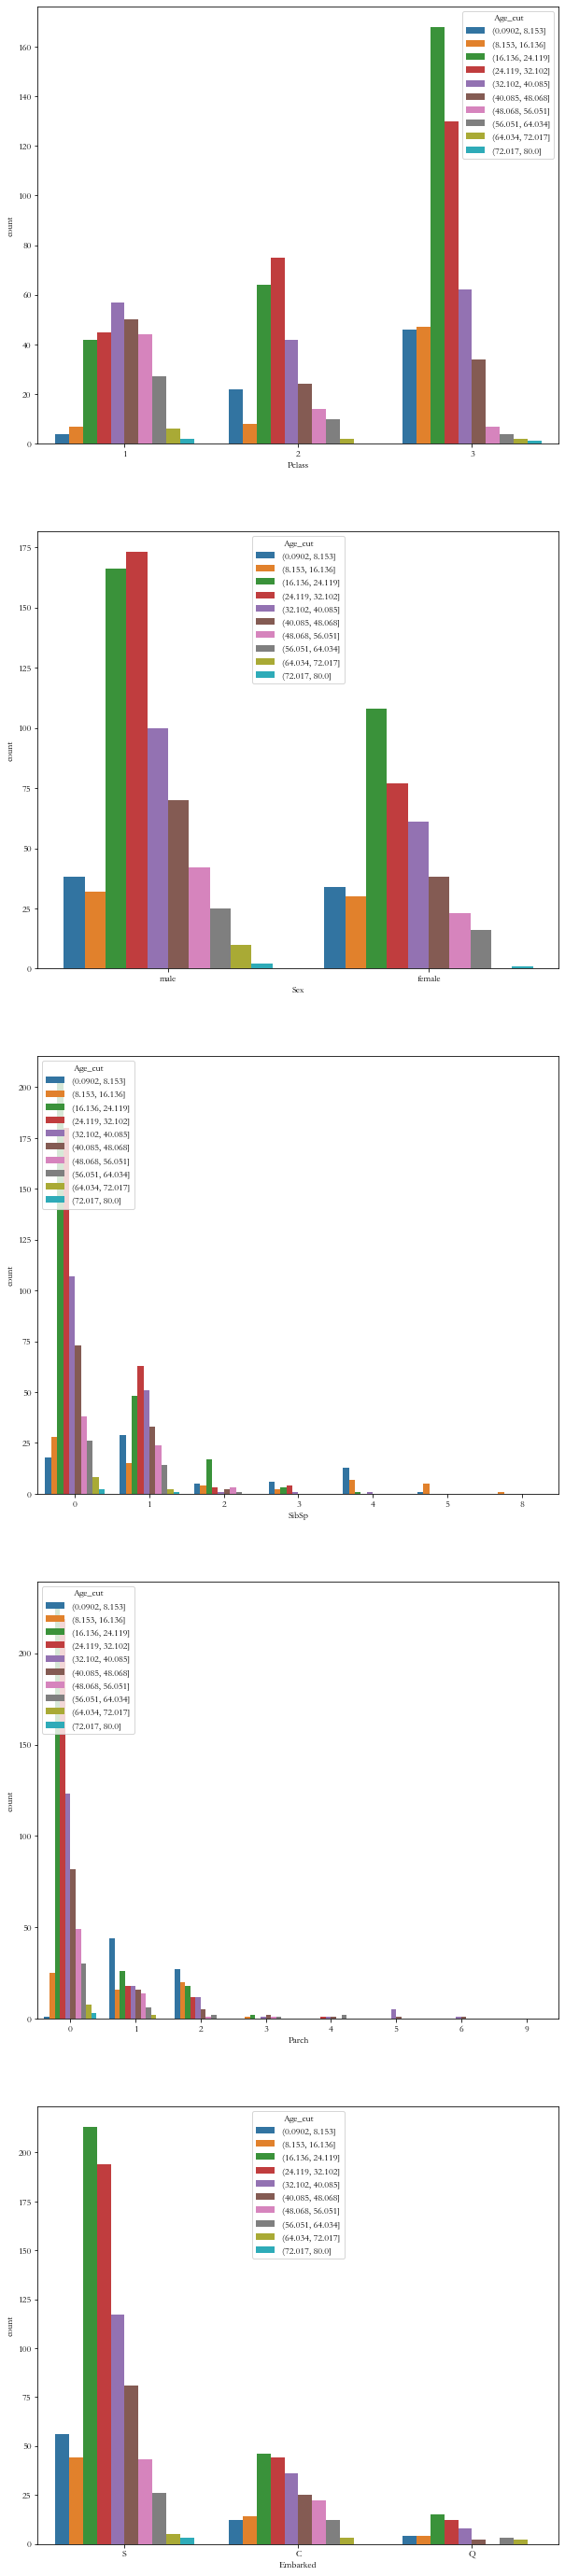

In [214]:
fig,axs = plt.subplots(nrows=5,ncols=1,figsize=(10,50))
number = 0
for feature in ['Pclass','Sex','SibSp','Parch','Embarked']:
    sns.countplot(x=feature,hue='Age_cut',data=df_all,ax=axs[number])
#     plt.show()
    number = number + 1    

### 观察Age字段和Fare

#### 看一下Fare 的数据分布情况

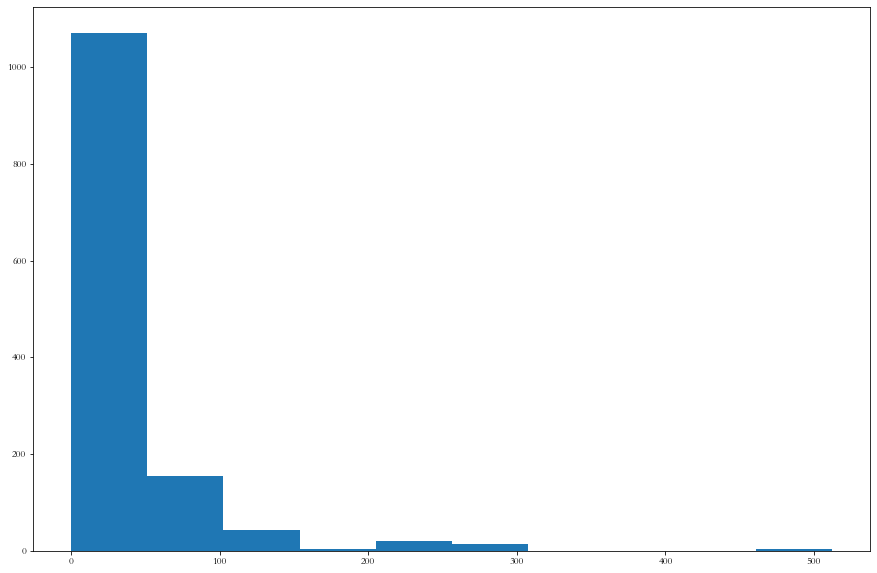

In [215]:
plt.figure(figsize=(15,10))
plt.hist(df_all['Fare'])
plt.show()

**大多数fare位于0-50区间**

<AxesSubplot:>

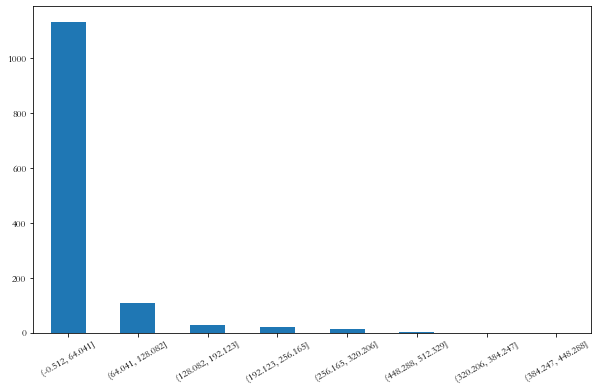

In [216]:
# 等量切分
df_all['Fare_cut'] = pd.cut(df_all['Fare'],8)
plt.figure(figsize=(10,6))
df_all['Fare_cut'].value_counts().plot(kind='bar',rot=30)

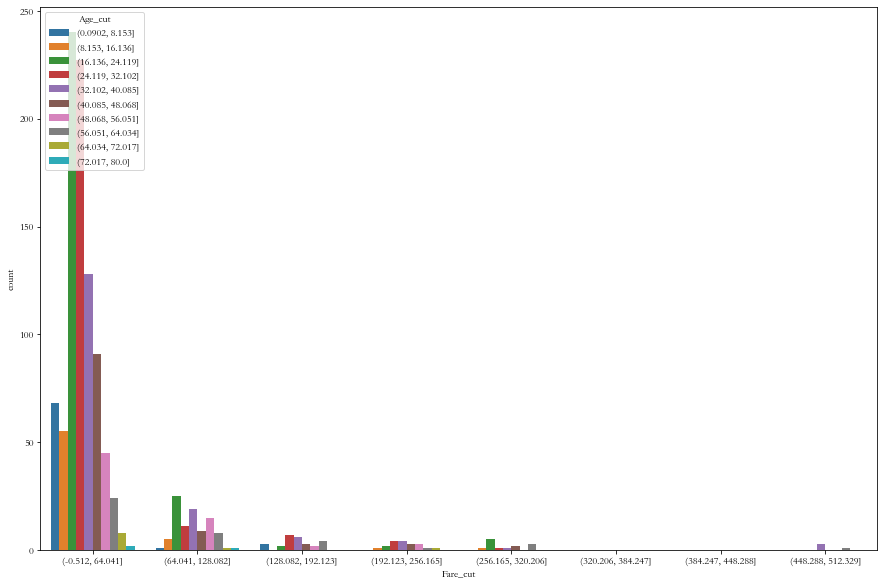

In [217]:
plt.figure(figsize=(15,10))
sns.countplot(x='Fare_cut',hue='Age_cut',data=df_all)
plt.show()

**Fare等量切分成10个区间**

In [218]:
df_all.groupby(['Fare_cut','Sex']).agg({'Age':'median'})

Age
Fare_cut           Sex          
(-0.512, 64.041]   female  24.00
                   male    28.00
(64.041, 128.082]  female  35.50
                   male    36.00
(128.082, 192.123] female  35.00
                   male    34.00
(192.123, 256.165] female  38.00
                   male    39.75
(256.165, 320.206] female  28.00
                   male    40.00
(320.206, 384.247] female    NaN
                   male      NaN
(384.247, 448.288] female    NaN
                   male      NaN
(448.288, 512.329] female  46.50
                   male    35.50

#### groupby.transform 分组之后用组内的Age中位数填充

In [219]:
df_all['Age'] = df_all.groupby(['Pclass','Sex','SibSp','Parch','Embarked','Fare_cut'])['Age'].transform(lambda x:x.fillna(x.median()))

In [220]:
df_all['Age'] = df_all.groupby(['Pclass','Sex'])['Age'].transform(lambda x:x.fillna(x.median()))

In [221]:
df_all[df_all['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cut,Fare_cut


## Cabin

In [222]:
df_all['Cabin'].isnull().value_counts()

True     1014
False     295
Name: Cabin, dtype: int64

In [223]:
del df_all['Cabin']

<div class="burk">
Cabin缺失值太多，直接删除了</div><i class="fa fa-lightbulb-o "></i>

**缺失值补充结束**

In [224]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Embarked     1309 non-null   object  
 11  Age_cut      1046 non-null   category
 12  Fare_cut     1309 non-null   category
dtypes: category(2), float64(3), int64(4), object(4)
memory usage: 116.3+ KB


In [225]:
df_all_copy = df_all.copy()
# 数据备份

# 获救分析

In [226]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cut,Fare_cut
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(16.136, 24.119]","(-0.512, 64.041]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(32.102, 40.085]","(64.041, 128.082]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(24.119, 32.102]","(-0.512, 64.041]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(32.102, 40.085]","(-0.512, 64.041]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(32.102, 40.085]","(-0.512, 64.041]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,26.0,0,0,A.5. 3236,8.0500,S,NaN,"(-0.512, 64.041]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,"(32.102, 40.085]","(64.041, 128.082]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,"(32.102, 40.085]","(-0.512, 64.041]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,26.0,0,0,359309,8.0500,S,NaN,"(-0.512, 64.041]"


In [227]:
survived_sum = df_train['Survived'].value_counts().sum()
df_train['Survived'].value_counts()/ survived_sum

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

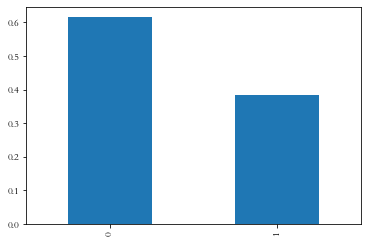

In [228]:
(df_train['Survived'].value_counts()/ survived_sum).plot(kind='bar')

**训练集中获救几率约为38%**

# Feature Engineering

## 新的feature----Family_Size

In [229]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

**用SibSp，Parch加1，得到Family_Size的值**

In [230]:
df_all[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cut,Fare_cut,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(16.136, 24.119]","(-0.512, 64.041]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(32.102, 40.085]","(64.041, 128.082]",2


## 删除feature----PassengerId,Name,Ticket	

In [231]:
df_all.drop(columns=['PassengerId','Name','Ticket','Age_cut','Fare_cut'],inplace=True)

df_all[:3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0.0,3,male,22.0,1,0,7.2500,S,2
1,1.0,1,female,38.0,1,0,71.2833,C,2
2,1.0,3,female,26.0,0,0,7.9250,S,1


## 分类型feature 编码

**<span class="burk">名义变量，有距变量适合用独热编码OneHotEncoder<br />
有距变量,适合用LabelEncoder</span>**

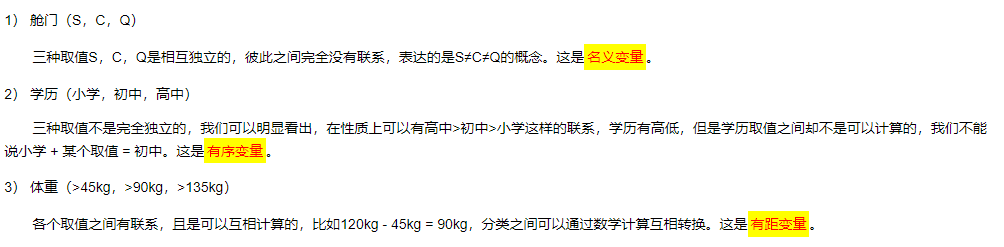

In [232]:
df_all

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0.0,3,male,22.0,1,0,7.2500,S,2
1,1.0,1,female,38.0,1,0,71.2833,C,2
2,1.0,3,female,26.0,0,0,7.9250,S,1
3,1.0,1,female,35.0,1,0,53.1000,S,2
4,0.0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,26.0,0,0,8.0500,S,1
1305,NaN,1,female,39.0,0,0,108.9000,C,1
1306,NaN,3,male,38.5,0,0,7.2500,S,1
1307,NaN,3,male,26.0,0,0,8.0500,S,1


### OneHotEncoder

In [233]:
cat_features_list = ['Sex', 'Embarked','Pclass']
df_all_encode = pd.DataFrame()
for feature in cat_features_list:
    data_encode = OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1, 1)).toarray()
    value_count = df_all[feature].unique().size
    new_columns = ['{}_{}'.format(feature,i) for i in range(1,value_count+1)]
    print(new_columns)
    df_encode = pd.DataFrame(data_encode,columns=new_columns)
#     print(df_encode)
    df_all_encode = pd.concat([df_all_encode,df_encode],axis=1)


['Sex_1', 'Sex_2']
['Embarked_1', 'Embarked_2', 'Embarked_3']
['Pclass_1', 'Pclass_2', 'Pclass_3']


**OneHotEncoder编码之后的数据如下**

In [234]:
df_all_encode

,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3,Pclass_1,Pclass_2,Pclass_3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1304,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1305,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1306,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1307,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


**将OneHotEncoder编码生成的数据和df_all拼接起来，并且将编码之前的四个feature:['Sex', 'Cabin', 'Embarked', 'Title']删除**

In [235]:
df_all = pd.concat([df_all,df_all_encode],axis=1)
df_all.drop(columns=['Sex','Pclass','Embarked'],inplace=True)

In [236]:
df_all[:3]

,Survived,Age,SibSp,Parch,Fare,Family_Size,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,1,0,7.2500,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1,0,71.2833,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0,0,7.9250,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [237]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Age          1309 non-null   float64
 2   SibSp        1309 non-null   int64  
 3   Parch        1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Family_Size  1309 non-null   int64  
 6   Sex_1        1309 non-null   float64
 7   Sex_2        1309 non-null   float64
 8   Embarked_1   1309 non-null   float64
 9   Embarked_2   1309 non-null   float64
 10  Embarked_3   1309 non-null   float64
 11  Pclass_1     1309 non-null   float64
 12  Pclass_2     1309 non-null   float64
 13  Pclass_3     1309 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 143.3 KB


## 数据切分

In [238]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]

del df_test['Survived']
y_train = df_train['Survived'].values
del df_train['Survived']

In [239]:
df_train.shape

(891, 13)

In [240]:
df_test.shape

(418, 13)

In [241]:
y_train.shape

(891,)

## 标准化

In [242]:
x_train = StandardScaler().fit_transform(df_train)
x_test = StandardScaler().fit_transform(df_test)

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (891, 13)
y_train shape: (891,)
x_test shape: (418, 13)


# model

## 决策树

In [243]:
df_result = pd.DataFrame()

In [244]:
from sklearn import tree 
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)
y_predict_with_dtree = decision_tree_model.predict(x_test)

df_result['y_predict_with_dtree'] = y_predict_with_dtree
df_result

,y_predict_with_dtree
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


## 逻辑回归

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
lr = LogisticRegression().fit(x_train,y_train)
y_predict_with_logisticReg = lr.predict(x_test)

df_result['y_predict_with_logisticReg'] = y_predict_with_logisticReg
df_result

,y_predict_with_dtree,y_predict_with_logisticReg
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,1.0
...,...,...
413,0.0,0.0
414,1.0,1.0
415,0.0,0.0
416,0.0,0.0


## 支持向量机

In [247]:
from sklearn import svm

In [248]:
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
y_predict_with_svm = svm_model.predict(x_test)

df_result['y_predict_with_svm'] = y_predict_with_svm
df_result

,y_predict_with_dtree,y_predict_with_logisticReg,y_predict_with_svm
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0
...,...,...,...
413,0.0,0.0,0.0
414,1.0,1.0,1.0
415,0.0,0.0,0.0
416,0.0,0.0,0.0


## KNN

In [249]:
from sklearn import neighbors

In [250]:
knnmodel = neighbors.KNeighborsClassifier(n_neighbors=2) #n_neighbors参数为分类个数
knnmodel.fit(x_train,y_train)

y_predict_with_knn = knnmodel.predict(x_test)
df_result['y_predict_with_knn'] = y_predict_with_knn
df_result

,y_predict_with_dtree,y_predict_with_logisticReg,y_predict_with_svm,y_predict_with_knn
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0
...,...,...,...,...
413,0.0,0.0,0.0,0.0
414,1.0,1.0,1.0,1.0
415,0.0,0.0,0.0,0.0
416,0.0,0.0,0.0,0.0


## 随机森林

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
model_randomforest = RandomForestClassifier().fit(x_train,y_train)
y_predict_with_random_forest = model_randomforest.predict(x_test)
df_result['y_predict_with_random_forest'] = y_predict_with_random_forest
df_result

,y_predict_with_dtree,y_predict_with_logisticReg,y_predict_with_svm,y_predict_with_knn,y_predict_with_random_forest
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,0.0
414,1.0,1.0,1.0,1.0,1.0
415,0.0,0.0,0.0,0.0,0.0
416,0.0,0.0,0.0,0.0,0.0


# 结果验证

这里为了本地快速得到我的预测数据的正确率，我从kaggle其他大神提交记录下获得了正确率为100%的预测结果作为验证数据；<br />
所以上面五个模型的正确率如下，<span class="burk">随机森林</span>得分最高：0.7871。

In [253]:
df_check = pd.read_csv(r'../titanic_dir/titanic_data/正确_submission_titanic.csv')
df_check = df_check['Survived']
# df_check
for column in df_result:
    df_concat = pd.concat([df_result[column],df_check],axis=1)
    df_concat['predict_tag'] = df_concat.apply(lambda x: 1 if x[0]==x[1] else 0,axis=1)
    right_rate = df_concat['predict_tag'].sum()/df_concat['predict_tag'].count()
    print(column,'正确率为：')
    print(np.round(right_rate,4))

y_predict_with_dtree 正确率为：
0.7249
y_predict_with_logisticReg 正确率为：
0.7679
y_predict_with_svm 正确率为：
0.7775
y_predict_with_knn 正确率为：
0.7632
y_predict_with_random_forest 正确率为：
0.7608
